In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread("img/elon.jpg")

In [3]:
cv2.imshow('original image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

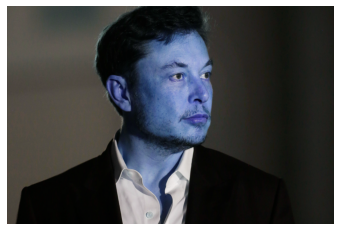

In [4]:
plt.imshow(img)
plt.axis(False)
plt.show()

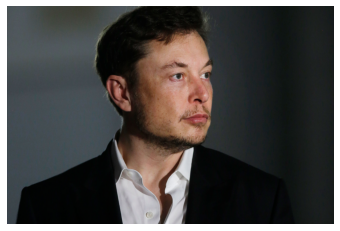

In [5]:
plt.imshow(img[:,:,::-1])
plt.axis(False)
plt.show()

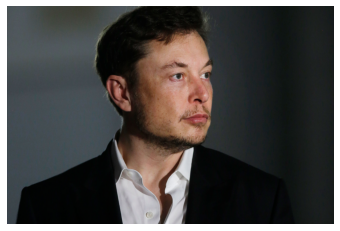

In [6]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis(False)
plt.show()

# Convert Image to a Pencil Sketch

#### <b>Step 1: Convert to Grey Image</b>
Using cvtColor function of OpenCV.

In [7]:
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### <b>Step 2: Invert Image</b>
Inverting the image can be done by either of the following methods

In [8]:
invert_img=cv2.bitwise_not(grey_img)
#invert_img=255-grey_img

#### <b>Step 3: Blur Image</b>
Apply Gaussian blur to the image. The second argument to the function is the kernel size, if should be a pair of odd numbers.
Larger the kernel size, more blurred the image will be and it will lose its subtle features.
For creating sketch, we require only the prominent features (contrasting edges) from the image.
For small images, kernel size of (3,3), (5,5) etc. will be sufficient, whereas for larger images, small kernel size do not create any impact.
Appropriate kernel size can be selected by trial and error method.

In [9]:
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)

#### <b>Step 4: Invert Blurred Image</b>
Repeat step 2

In [10]:
invblur_img=cv2.bitwise_not(blur_img)
#invblur_img=255-blur_img

#### <b>Step 5: Sketch</b>
The sketch can be obtained by performing bit-wise division between the grayscale image and the inverted-blurred image.

In [11]:
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

#### <b>Step 6: Save Sketch</b>


In [12]:
 cv2.imwrite('img/sketch.png', sketch_img)

True

#### <b>Step 7: Display sketch</b>

In [13]:
cv2.imshow('sketch image',sketch_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### <b>Original Image vs Sketch</b>
We can display the original image and sketch side by side for comparison.

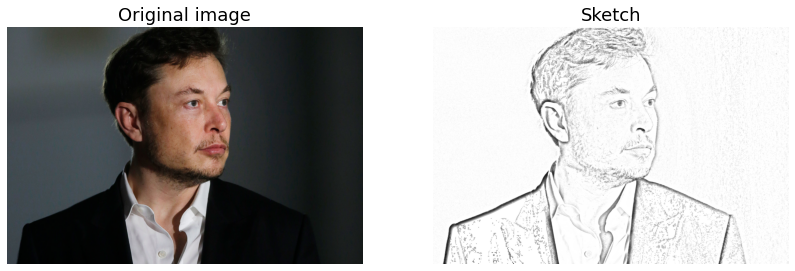

In [14]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Original image', size=18)
plt.imshow(RGB_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Sketch', size=18)
rgb_sketch=cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sketch)
plt.axis('off')
plt.show()